# QUBO Linear Solver 

This notebook illustrates how to use the QUBO linear solver to solve individual linear systems. We will use sparse random matrices that mimic the matrices obtained by EPANET for small water networks.

Let's define the system:

In [1]:
import scipy.sparse as sp 
import numpy as np 

# set the seed
np.random.seed(1234)

# size of the linear system
size = 8

# create the matrix
A = sp.random(size,size,density=0.25)
A = (A+A.T)/2
A = A.todense()
A

matrix([[0.        , 0.13131305, 0.        , 0.        , 0.8399231 ,
         0.29986541, 0.21507568, 0.38226539],
        [0.13131305, 0.        , 0.        , 0.        , 0.19850098,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.06808472, 0.        , 0.04047348,
         0.08200666, 0.47523295, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.23693   , 0.        , 0.        ],
        [0.8399231 , 0.19850098, 0.04047348, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.29986541, 0.        , 0.08200666, 0.23693   , 0.        ,
         0.3827107 , 0.        , 0.        ],
        [0.21507568, 0.        , 0.47523295, 0.        , 0.        ,
         0.        , 0.32815036, 0.05927707],
        [0.38226539, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.05927707, 0.        ]])

In [2]:
# create the right hand side
b = np.random.rand(size)
b

array([0.89632852, 0.76430853, 0.37540494, 0.02581418, 0.90653093,
       0.78641778, 0.61931523, 0.21158894])

## Solve the problem classically
We can solve this sytem with a classical linear solver to obtain a reference solution

In [3]:
reference = np.linalg.solve(A,b)
reference

array([ 0.51786703,  2.03046774,  1.692778  ,  1.90187358,  3.50782058,
        0.10895279,  0.22987475, -6.27498497])

## Solve the problem with the QUBO linear solver
We can now use the QUBO solver to solve the problem

In [4]:
from wntr_quantum.linear_solver import QUBO_SOLVER

qubols = QUBO_SOLVER(
    num_qbits=11, # Number of qubits used to encode each float
    num_reads=500, # number of reads of the simulated annealing
    range=10, # max absolute value of the encoded floats 
)

We can now use the solver to obtain the solution of the linear system 

In [5]:
res = qubols(A, b)
res

/home/nico/miniconda3/envs/vitens_wntr_1/lib/python3.9/site-packages/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


QUBOResult(solution=array([ 0.567,  1.877,  1.564,  1.857,  3.118,  0.127,  0.254, -5.396]), residue=0.07552041138416518, ref=array([0., 0., 0., 0., 0., 0., 0., 0.]))

We can then plot the reference solution against the qubo solution

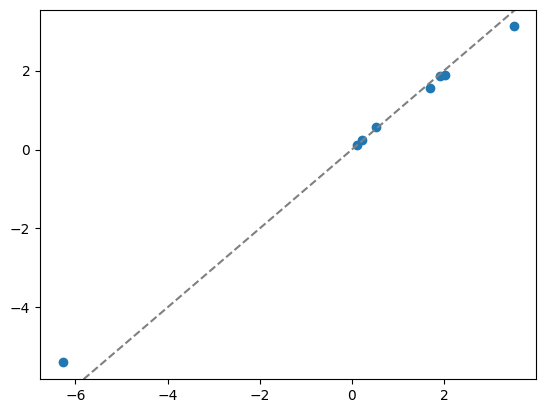

In [6]:
import matplotlib.pyplot as plt
plt.scatter(reference, res.solution)
plt.axline((0, 0), slope=1, linestyle="--", color="gray")
plt.show()